# Data Processing

## From unbalanced data to balanced data

In [134]:
# Download from: https://archive.ics.uci.edu/ml/machine-learning-databases/00222/ 
# "bank-additional.zip"
    
import os
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('C:/_Emory/1&3-672-Intro to BA/Group Project/bank-additional-full.csv',sep=";")
bank = pd.read_csv('C:/_Emory/1&3-672-Intro to BA/Group Project/bank-additional-full.csv',sep=";")
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [135]:
#Change y into binominal
bank.y.replace(('yes', 'no'), ('1', '0'), inplace=True)

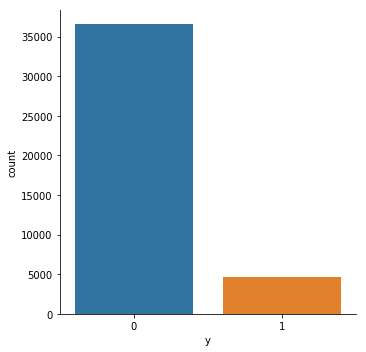

In [136]:
sns.catplot(x="y", kind="count", data=bank)

In [139]:
#Dealing with class imbalance
from sklearn.utils import resample

bank_majority = bank[bank.y=='0']
bank_minority = bank[bank.y=='1']
 
# Downsample majority class
bank_majority_downsampled = resample(bank_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=bank_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
bank_downsampled = pd.concat([bank_majority_downsampled, bank_minority])
 
# Display new class counts
bank_downsampled.y.value_counts()

0    4640
1    4640
Name: y, dtype: int64

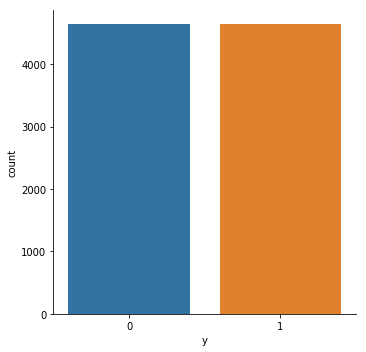

In [140]:
sns.catplot(x="y", kind="count", data=bank_downsampled)

In [141]:
#Save balanced data
raws_path = os.path.join('C:/_Emory/1&3-672-Intro to BA/Group Project', 'new.csv')
bank_downsampled.to_csv(raws_path)

## Have a look on data

In [142]:
#Check on missing values
data = pd.read_csv('C:/_Emory/1&3-672-Intro to BA/Group Project/new.csv') 
bank = pd.read_csv('C:/_Emory/1&3-672-Intro to BA/Group Project/new.csv') 
data=data.iloc[:,1:]
bank=bank.iloc[:,1:]

#check null 
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Basic descriptive statistics and data visualization

In [143]:
# Check on numerical variables
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000
mean,40.319289,387.956142,2.341595,888.236638,0.315841,-0.495700,93.477569,-40.220248,2.966899,5135.740248,0.500000
std,11.963739,360.460135,2.379076,312.642525,0.698348,1.717798,0.634240,5.345979,1.887555,86.942942,0.500027
min,17.000000,2.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,145.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.244000,5076.200000,0.000000
50%,38.000000,268.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.021000,5191.000000,0.500000
75%,48.000000,528.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000,1.000000
max,98.000000,4199.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000159B5D73630>,
      dtype=object)

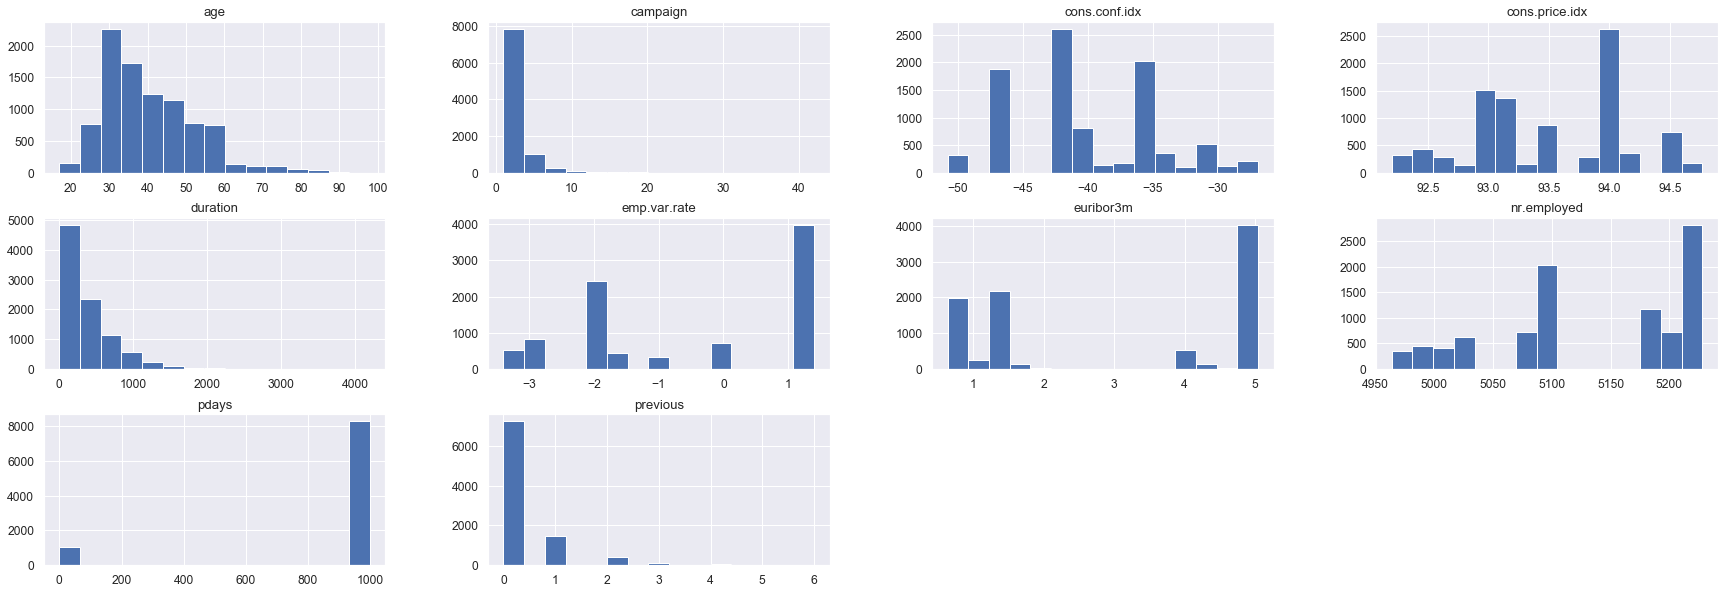

In [182]:
#Histograms on numerical variables
numerical=['age','duration','campaign','pdays','previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
data[numerical].hist(bins=15, figsize=(30, 10), layout=(3, 4))

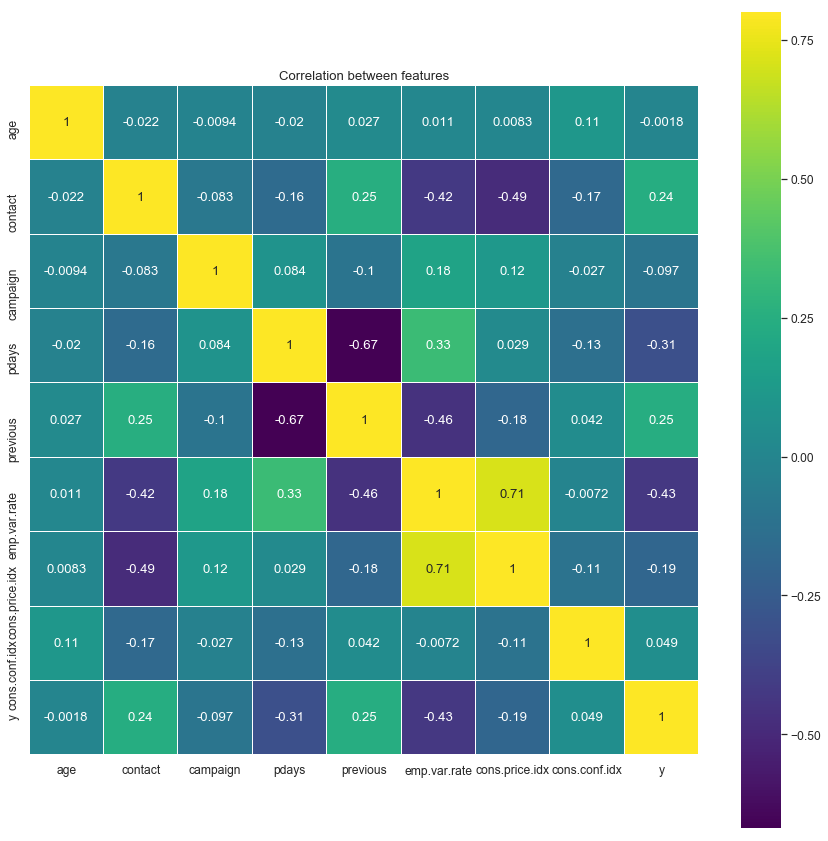

In [180]:
#Heatmap showing correlation between variables
corrMatrix = bank.corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 15))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features');

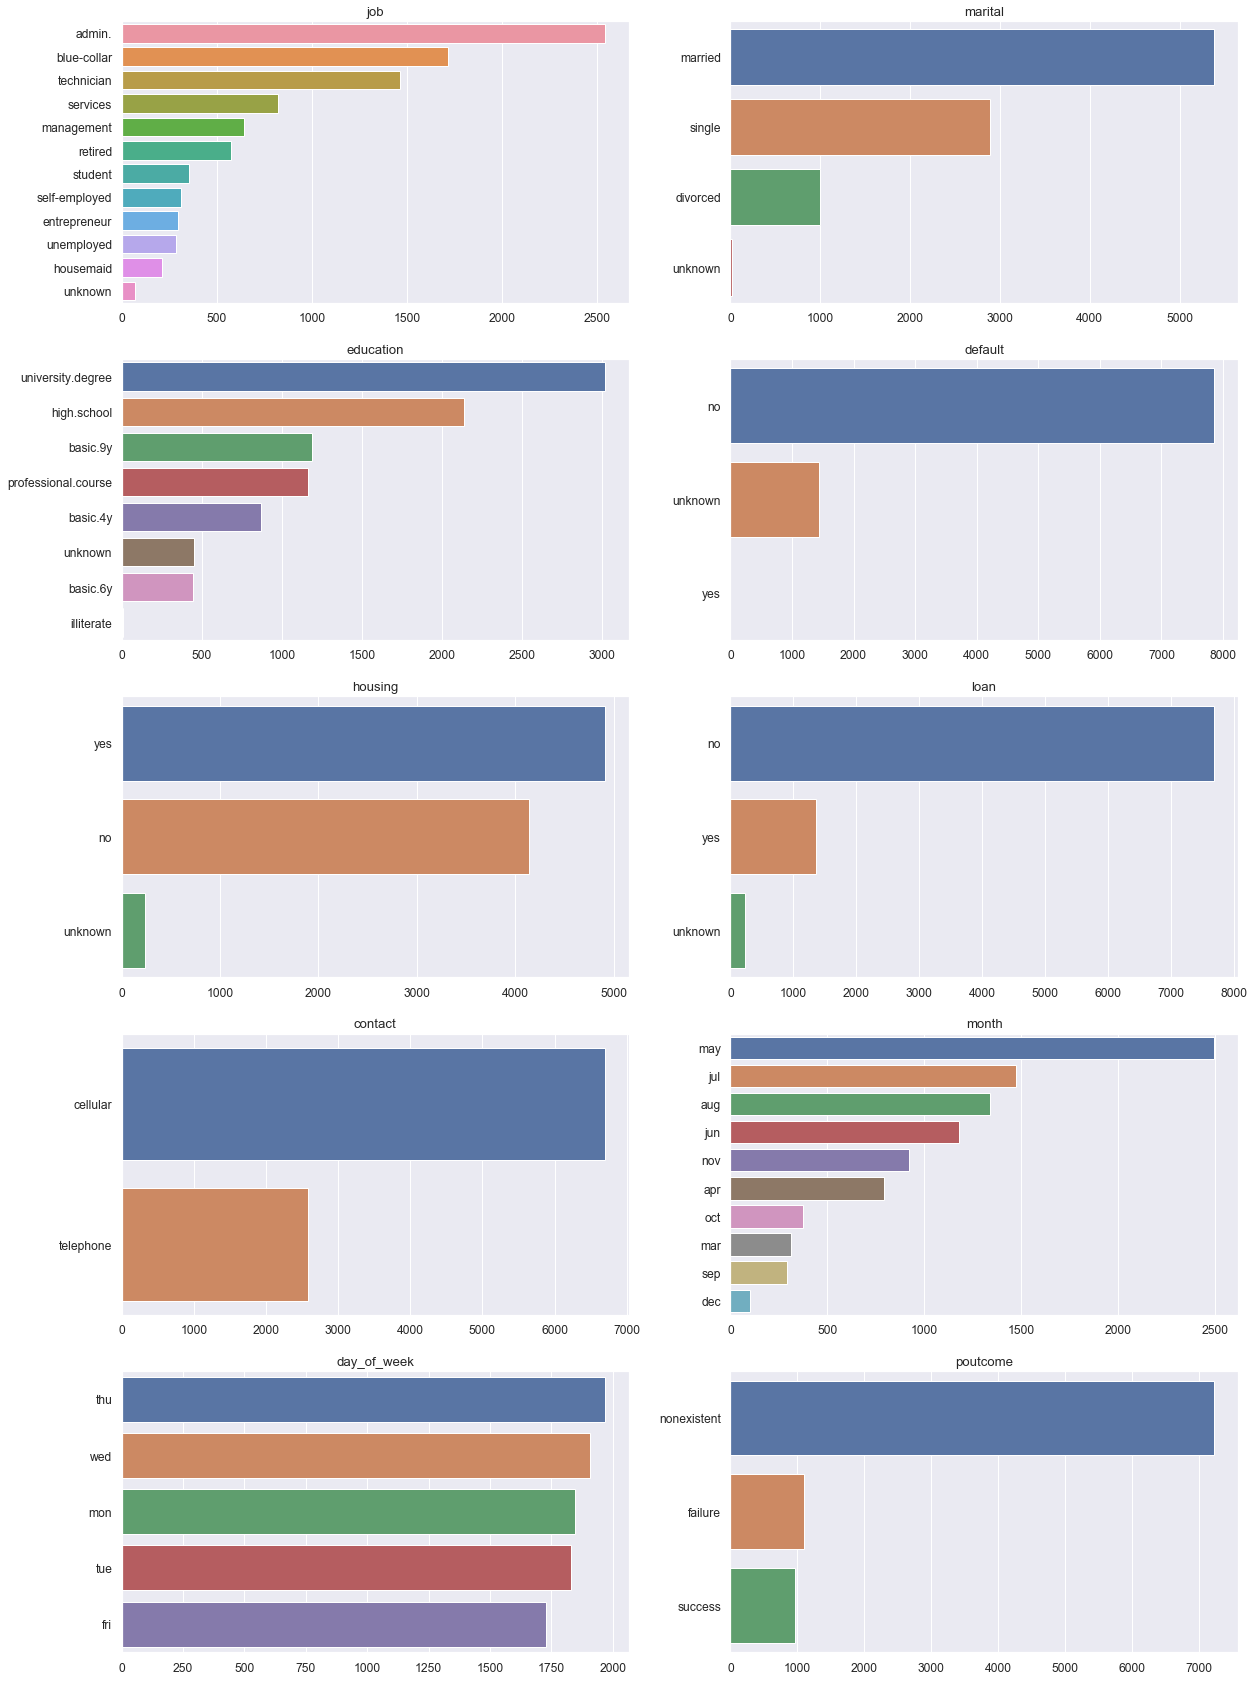

In [185]:
#Categorical variables
cat_attributes = [col for col in data.columns if type(data['%s'%col][0])==str]
#cat_attributes=cat_attributes[0:-1]
#df[cat_attributes].describe()
fig = plt.figure(figsize = (20,30))
for i, cat in enumerate(cat_attributes, 1):
    ax = fig.add_subplot(5,2, i)
    sns.barplot(data[cat].value_counts().values, data[cat].value_counts().index)
    ax.title.set_text(cat)

### Have a look on Unknown

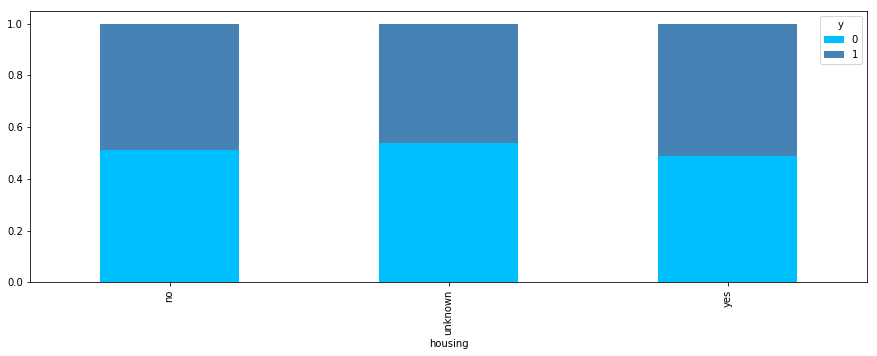

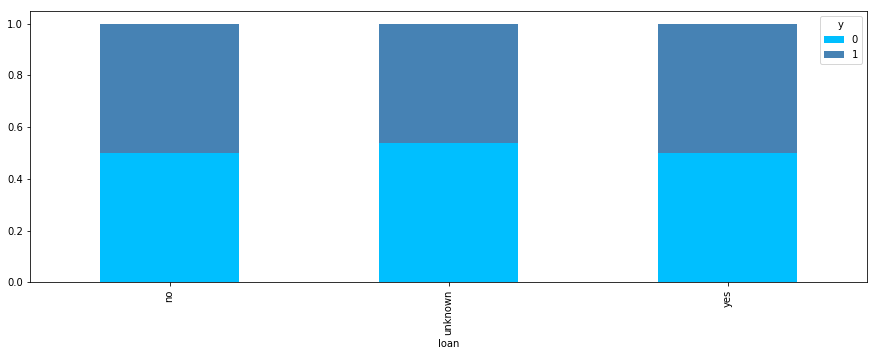

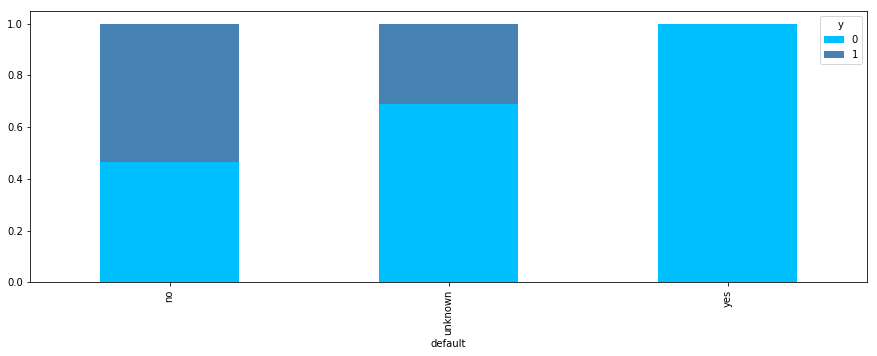

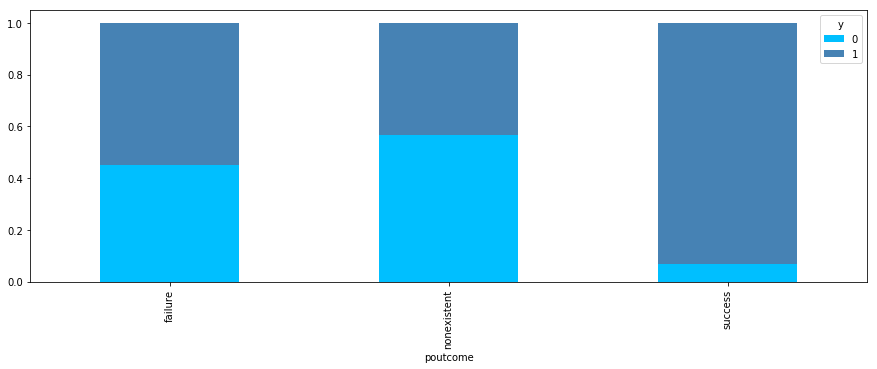

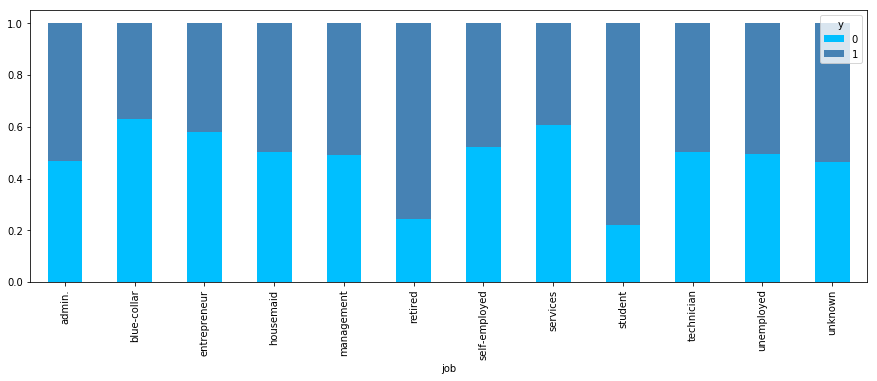

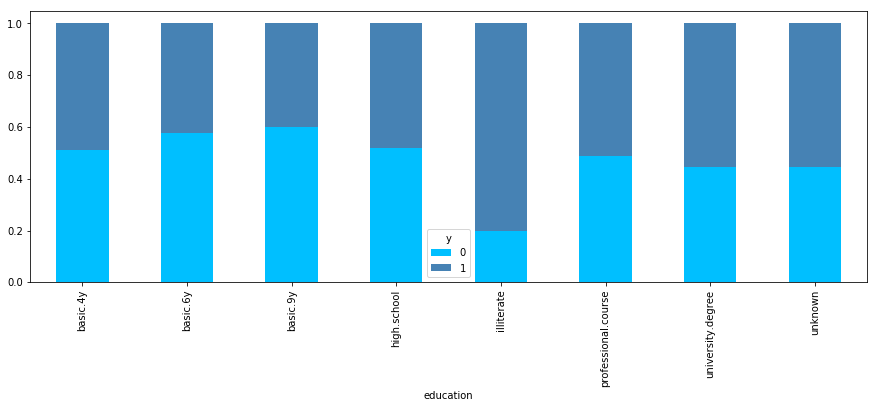

In [144]:
###########test how categorical variables impact deposit (how label spreds within categorical variables)
c=['housing','loan','default','poutcome','job','education']
for i in c:
    draw_data = pd.crosstab(bank[i], bank.y)
    draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
    plt.show()

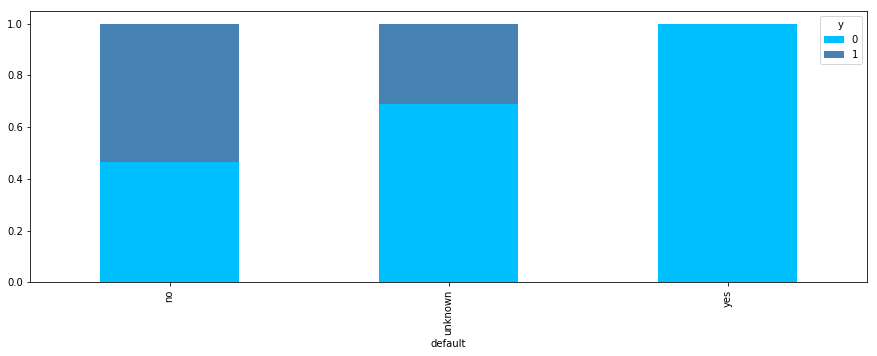

y           0     1
default            
no       3649  4197
unknown   990   443
yes         1     0


In [145]:
########## individually check the impact of categorical variable (how label spreds within categorical variables)
draw_data = pd.crosstab(bank['default'], bank.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()
########## seem like not categorizing jobs generates better result
print(draw_data)

## Data Preparation

### Delete variables with multicollinearity and data leakage

In [146]:
bank.drop(['euribor3m'],axis=1,inplace = True)
bank.drop(['nr.employed'],axis=1,inplace = True)
bank.drop(['duration'],axis=1,inplace = True)

### Transformation using boxcox

In [147]:
from scipy.stats import boxcox
bank['previous']=bank['previous']+1 
bank['previous'], lam1 = boxcox(bank['previous'])
bank['age'], lam2 = boxcox(bank['age'])
bank['campaign'], lam3 = boxcox(bank['campaign'])
bank['pdays']=bank['pdays']+1
bank['pdays'], lam4 = boxcox(bank['pdays'])
bank['cons.price.idx'], lam5 = boxcox(bank['cons.price.idx'])
bank['cons.conf.idx']=bank['cons.conf.idx']+50.9
bank['cons.conf.idx'], lam6 = boxcox(bank['cons.conf.idx'])

    
print('Lambda: %f' % lam1)
print('Lambda: %f' % lam2)
print('Lambda: %f' % lam3)
print('Lambda: %f' % lam4)
print('Lambda: %f' % lam5)
print('Lambda: %f' % lam6)


Lambda: -4.849672
Lambda: -0.323753
Lambda: -0.764148
Lambda: 1.754022
Lambda: 9.276278
Lambda: 0.672229


AxesSubplot(0.125,0.125;0.775x0.755)


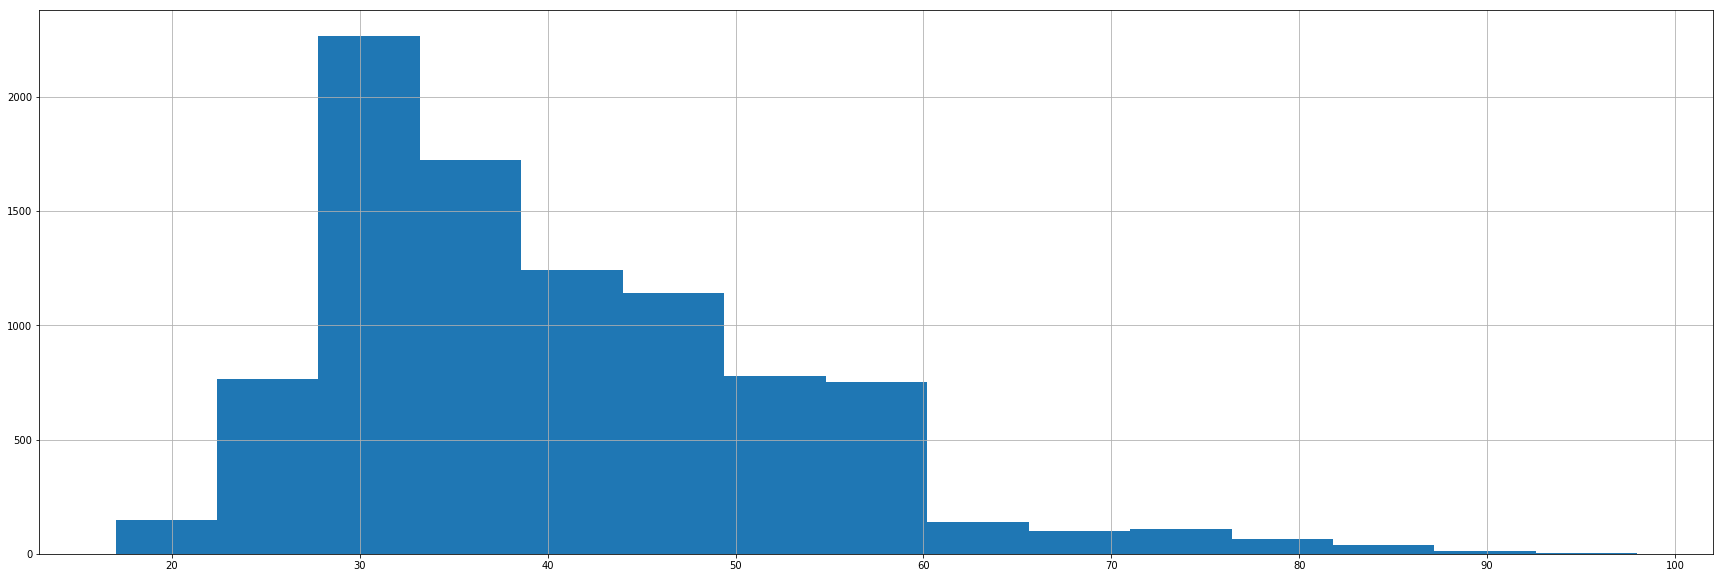

In [148]:
#Transformation comparison
print(data['age'].hist(bins=15, figsize=(30, 10)))

AxesSubplot(0.125,0.125;0.775x0.755)


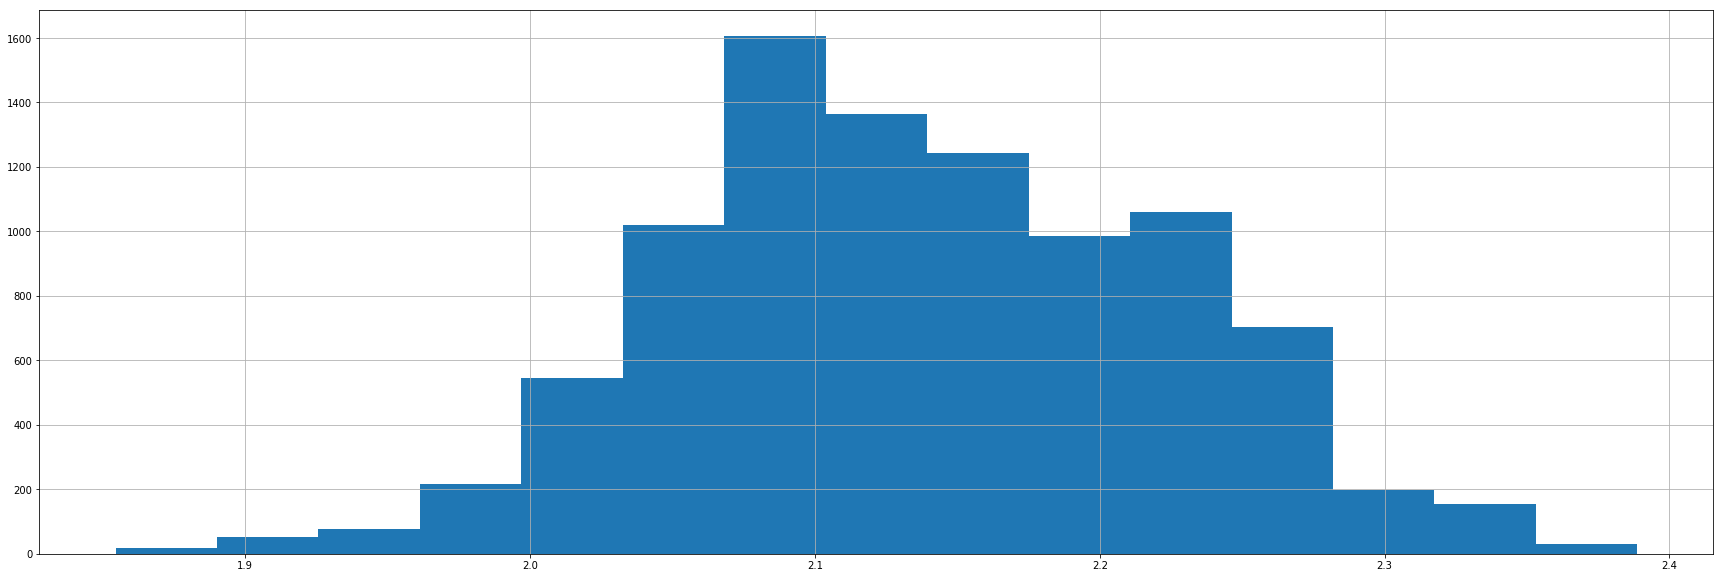

In [149]:
print(bank['age'].hist(bins=15, figsize=(30, 10)))

Figure(432x288)
Figure(432x288)
age               0.009948
campaign          0.240284
pdays            -2.468539
previous          1.340678
emp.var.rate     -0.148947
cons.price.idx   -0.020796
cons.conf.idx    -0.078623
y                 0.000000
dtype: float64
age               0.987551
duration          2.274572
campaign          4.811022
pdays            -2.468612
previous          2.865875
emp.var.rate     -0.148947
cons.price.idx   -0.106368
cons.conf.idx     0.357998
euribor3m        -0.026220
nr.employed      -0.432545
y                 0.000000
dtype: float64


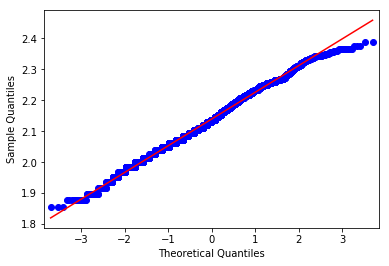

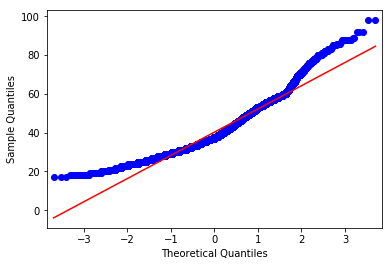

In [150]:
#Using qq plot to contrast variable transformation
import numpy as np
import statsmodels.api as sm
import pylab

print(sm.qqplot(bank.age, line='s'))
print(sm.qqplot(data.age, line='s'))

print(bank.skew(axis = 0, skipna = True))
print(data.skew(axis = 0, skipna = True))
pylab.show()

## Get dummy variables

In [151]:
#create dummy variables

bank.contact.replace(('cellular','telephone'),(1,0),inplace=True)
bank.loan.replace(('yes','no'),(1,0),inplace=True)


dummy=pd.get_dummies(data=bank,columns=['marital','job','education','poutcome','month','default','housing','loan','day_of_week'])


print(dummy.isnull().sum())

age                              0
contact                          0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
y                                0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.schoo

## Check Final Dataset

In [152]:
dummy.head()

,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,y,marital_divorced,...,housing_unknown,housing_yes,loan_0,loan_1,loan_unknown,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,2.092996,1,0.000000,104238.507597,0.0,-1.8,1.941704e+17,2.722453,0,0,...,0,1,0,1,0,0,1,0,0,0
1,2.223895,1,0.538114,104238.507597,0.0,1.4,2.149771e+17,4.632742,0,0,...,0,1,1,0,0,0,0,0,1,0
2,2.072635,1,0.538114,104238.507597,0.0,1.4,2.051202e+17,7.615033,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2.102573,0,0.854957,104238.507597,0.0,1.1,2.165963e+17,7.490583,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2.137454,1,0.000000,104238.507597,0.0,1.4,2.051202e+17,7.615033,0,0,...,0,0,1,0,0,0,0,0,1,0


# Models

In [153]:
#Get X and y
y=dummy['y']
dummy.drop(['y'],axis=1,inplace = True)
X=dummy
X=np.int8(X)

## Decision Tree

In [154]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier 


#decision tree model

inner_cv = KFold(n_splits=5, shuffle=True,random_state=45)
outer_cv = KFold(n_splits=5, shuffle=True,random_state=39)

# Decision Tree Parameter Tuning
# Choosing depth of the tree AND splitting criterion AND min_samples_leaf AND min_samples_split
gs_dt2 = GridSearchCV(estimator=DecisionTreeClassifier(random_state=40),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5],
                              'min_samples_split':[2,3,4,5]}],
                  scoring='accuracy',
                  cv=inner_cv,
                  n_jobs=-1)

gs_dt2 = gs_dt2.fit(X,y)
print("\n Parameter Tuning for Decision Tree")
print("Non-nested CV accuracy: ", gs_dt2.best_score_)
print("Optimal Parameter: ", gs_dt2.best_params_)
print("Optimal Estimator: ", gs_dt2.best_estimator_)
nested_score_gs_dt2 = cross_val_score(gs_dt2, X=X, y=y, cv=outer_cv)
#nested_score_gs_dt2 = cross_val_score(DecisionTreeClassifier(**gs_dt2.best_params_, random_state=42), X=X, y=y, cv=inner_cv, scoring='f1', n_jobs=4)
print("Nested CV accuracy: ",nested_score_gs_dt2.mean(), " +/- ", nested_score_gs_dt2.std())




 Parameter Tuning for Decision Tree
Non-nested CV accuracy:  0.7407327586206897
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')
Nested CV accuracy:  0.7408405172413792  +/-  0.0074032603609127815


## Logistic Regression

In [155]:
##########################logistic regression Parameter Tuning#############################
from sklearn.linear_model import LogisticRegression 
gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=42),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=inner_cv, n_jobs=-1)

gs_lr2 = gs_lr2.fit(X,y)
print("\n Parameter Tuning logistic regression")
print("Non-nested CV accuracy: ", gs_lr2.best_score_)
print("Optimal Parameter: ", gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)
nested_score_gs_lr2 = cross_val_score(gs_lr2, X=X, y=y, cv=outer_cv)
print("Nested CV accuracy:",nested_score_gs_lr2.mean(), " +/- ", nested_score_gs_lr2.std())


 Parameter Tuning logistic regression
Non-nested CV accuracy:  0.7338362068965517
Optimal Parameter:  {'C': 0.1, 'penalty': 'l1'}
Optimal Estimator:  LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Nested CV accuracy: 0.7307112068965518  +/-  0.005876550950187918


## kNN

In [171]:
################################### kNN Parameter Tuning ###################################
from sklearn.model_selection import train_test_split
from sklearn import neighbors
#Standardize Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# Choosing k for kNN AND type of distance
gs_knn2 = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='accuracy',
                  cv=inner_cv,
                  n_jobs=-1)

gs_knn2 = gs_knn2.fit(X,y)  
print("\n Parameter Tuning KNN")
print("Non-nested CV accuracy: ", gs_knn2.best_score_)
print("Optimal Parameter: ", gs_knn2.best_params_)
print("Optimal Estimator: ", gs_knn2.best_estimator_) # Estimator that was chosen by the search, i.e. estimator which gave highest score
nested_score_gs_knn2 = cross_val_score(gs_knn2, X=X, y=y, cv=outer_cv)
print("Nested CV accuracy:",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())


 Parameter Tuning KNN
Non-nested CV accuracy:  0.6987068965517241
Optimal Parameter:  {'n_neighbors': 21, 'weights': 'uniform'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')
Nested CV accuracy: 0.7026939655172414  +/-  0.013053479190067213


# Evaluation

## ROC Curve & AUC

10-fold cross validation:

ROC AUC: 0.624 (+/- 0.292) [Logistic regression]
ROC AUC: 0.553 (+/- 0.376) [Decision tree]
ROC AUC: 0.600 (+/- 0.235) [kNN]


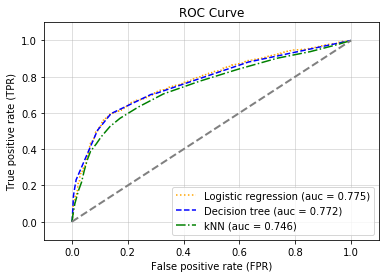

In [179]:
############################### Import Libraries & Modules #################################

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=8)
######################################## Classifiers ########################################

# Logistic Regression Classifier
clf1 = LogisticRegression(penalty='l1', 
                          C=0.1,
                          random_state=42)

# Decision Tree Classifier
clf2 = DecisionTreeClassifier(criterion='entropy', max_depth =4, min_samples_leaf=5, min_samples_split=2,
                              random_state=42)

# kNN Classifier
clf3 = KNeighborsClassifier(n_neighbors=21,weights='uniform')

# Label the classifiers
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

#################################### Cross - Validation ####################################


print('10-fold cross validation:\n')
# Note: We are assuming here that the data is standardized. For the homework, you need to make sure the data is standardized.
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=X,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.3f (+/- %0.3f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.3f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')
plt.title('ROC Curve')

#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

## Learning Curve

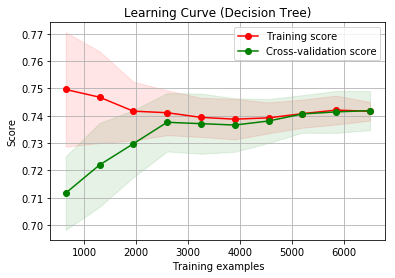

In [170]:

############################## Function for Learning Curves ##############################

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()                    #display figure
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples") #y label title
    plt.ylabel("Score")             #x label title
    
    # Class learning_curve determines cross-validated training and test scores for different training set sizes
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    # Cross validation statistics for training and testing data (mean and standard deviation)
    train_scores_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
    train_scores_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
    test_scores_mean = np.mean(test_scores, axis=1)   # Compute the arithmetic mean along the specified axis.
    test_scores_std = np.std(test_scores, axis=1)     # Compute the standard deviation along the specified axis.

    plt.grid() # Configure the grid lines

    # Fill the area around the line to indicate the size of standard deviations for the training data
    # and the test data
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r") # train data performance indicated with red
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g") # test data performance indicated with green
    
    # Cross-validation means indicated by dots
    # Train data performance indicated with red
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    # Test data performance indicated with green
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best") # Show legend of the plot at the best location possible
    return plt             # Function that returns the plot as an output
########################### Visualization of Learning Curves ###########################

# Determines cross-validated training and test scores for different training set sizes
from sklearn.model_selection import learning_curve 
# Random permutation cross-validator
from sklearn.model_selection import ShuffleSplit
# Logistic regression classifier class
from sklearn.linear_model import LogisticRegression
# kNN classifier class
from sklearn import neighbors
# Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, 
# plots some lines in a plotting area, decorates the plot with labels, etc
import matplotlib.pyplot as plt


title = "Learning Curve (Decision Tree)"

# Class ShuffleSplit is a random permutation cross-validator
# Parameter n_splits = Number of re-shuffling & splitting iterations
# Parameter test_size = represents the proportion of the dataset to include in the test split (float between 0.0 and 1.0) 
# Parameter random_state = the seed used by the random number generator
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
estimator= DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')# Plots the learning curve based on the previously defined function for the logistic regression estimator
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=-1)
#plt.ylim([0.9,1.0])
plt.show() # Display the figure

## Visualizing Decision Tree

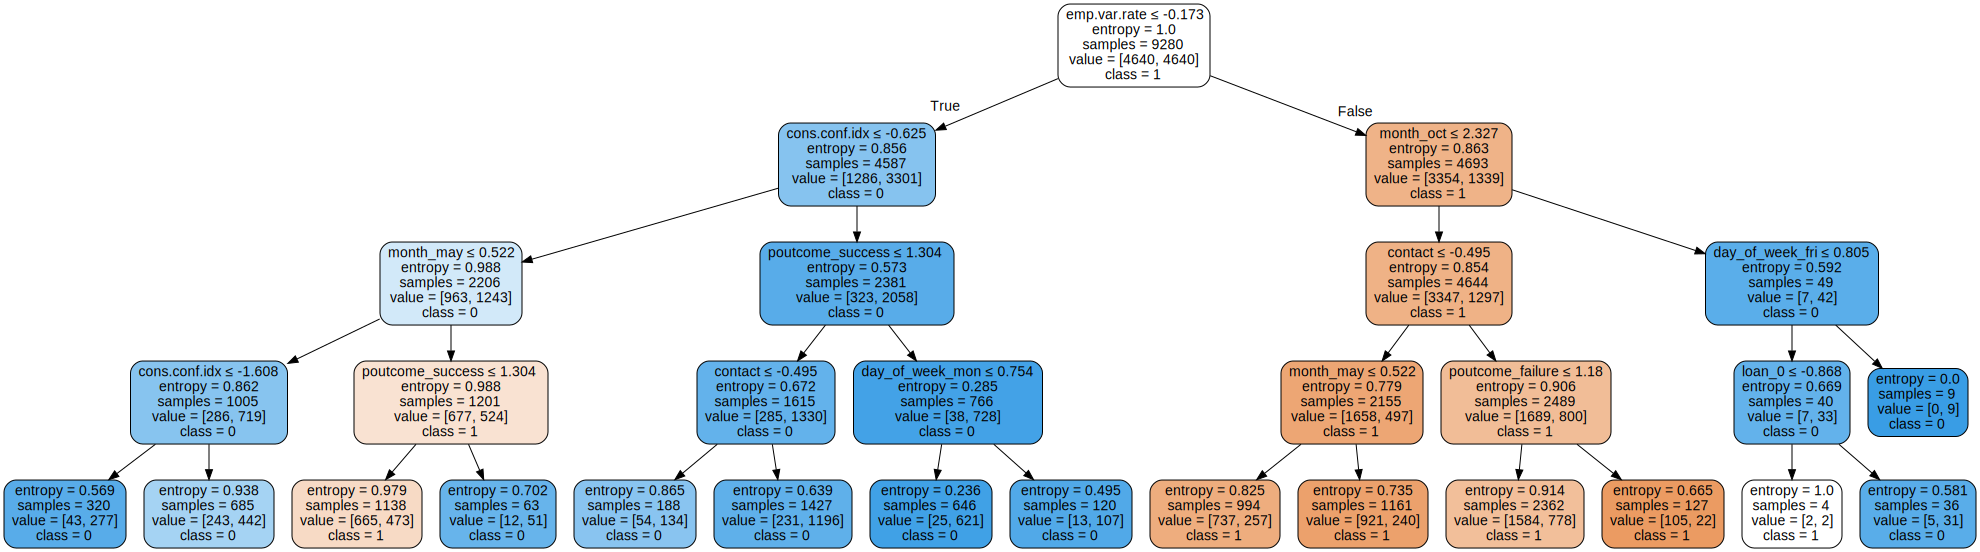

In [168]:
import graphviz
from sklearn import tree

# The following code trains a DecisionTreeClassifier on the dataset (all attributes are being used now)
# Decision Tree Induction (Fitting the Model)
clf2 = tree.DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=40,
            splitter='best')
clf2 = clf2.fit(X, y)

dot_data = tree.export_graphviz(clf2, out_file=None,
                        feature_names=list(dummy)[:],
                                class_names=['1','0'],
                         filled=True, rounded=True,  
                         special_characters=True)
os.environ["PATH"] += os.pathsep +  'C:/Users/maysh/AppData/Local/Continuum/anaconda3/Library/bin/graphviz' #environment,  ‘dot -version’ to get the bin directory
graph = graphviz.Source(dot_data) 
graph

## Confusion Matrix

In [178]:
from sklearn.metrics import confusion_matrix
y_pred = clf2.predict(X) 
cnf_matrix = confusion_matrix(y, y_pred)
print('Confusion Matrix')
print(cnf_matrix)

Confusion Matrix
[[4014  626]
 [1772 2868]]
